<a href="https://colab.research.google.com/github/gorzanskik-ai/statistics/blob/main/02_probits/07_covariance_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/statistics/data/yellow_tripdata_2021-05.parquet"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
taxi = pd.read_parquet(path, engine='auto',
        columns=['trip_distance', 'tpep_pickup_datetime', "tip_amount", "fare_amount","RatecodeID"],
        storage_options=None, use_nullable_dtypes=False)

taxi.query("tpep_pickup_datetime>='2021-05-09' and tpep_pickup_datetime<'2021-05-10'",
    inplace=True)

taxi.query("tip_amount<=100 and fare_amount>0 and RatecodeID==4 and tip_amount>0", inplace=True)

Covariance

In [52]:
print(f"Covariance: {taxi['fare_amount'].cov(taxi['tip_amount'])}")
print(taxi[['trip_distance', 'fare_amount', 'tip_amount', 'RatecodeID']].cov())

Covariance: 386.66075354609944
               trip_distance  fare_amount  tip_amount  RatecodeID
trip_distance     192.366561   715.442695   70.140695         0.0
fare_amount       715.442695  3385.828014  386.660754         0.0
tip_amount         70.140695   386.660754  128.459962         0.0
RatecodeID          0.000000     0.000000    0.000000         0.0


Correlation

In [53]:
print(f"Correlation: {taxi['fare_amount'].corr(taxi['tip_amount'])}")
print(taxi[['trip_distance', 'fare_amount', 'tip_amount', 'RatecodeID']].corr())

Correlation: 0.5862917080187156
               trip_distance  fare_amount  tip_amount  RatecodeID
trip_distance       1.000000     0.886498    0.446192         NaN
fare_amount         0.886498     1.000000    0.586292         NaN
tip_amount          0.446192     0.586292    1.000000         NaN
RatecodeID               NaN          NaN         NaN         NaN


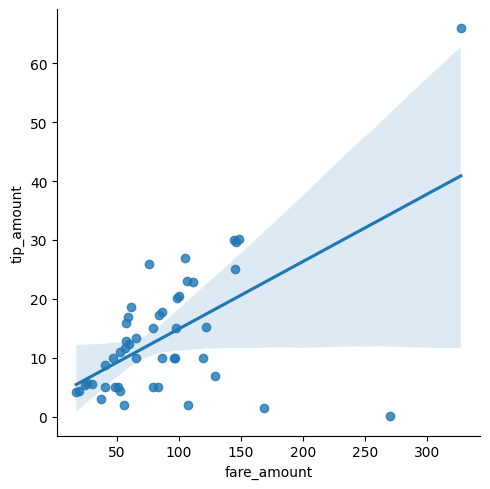

In [54]:
import seaborn as sns

sns.lmplot(x='fare_amount', y='tip_amount', data=taxi[['fare_amount', 'tip_amount']])
plt.show()

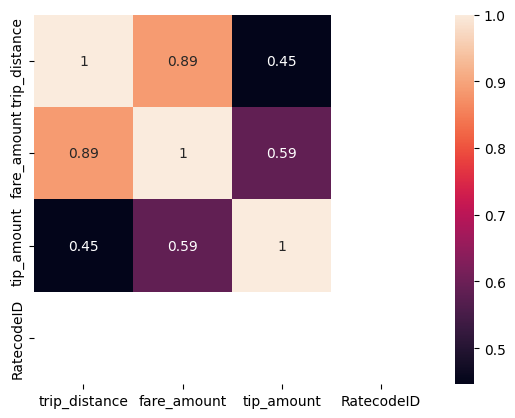

In [55]:
ax = sns.heatmap(taxi[['trip_distance', 'fare_amount', 'tip_amount', 'RatecodeID']].corr(), annot=True)
plt.show()

IQR method for outliers

In [56]:
fare_amount_q1 = taxi['fare_amount'].quantile(0.25)
fare_amount_q3 = taxi['fare_amount'].quantile(0.75)
fare_amount_iqr = fare_amount_q3 - fare_amount_q1
fare_amount_min = fare_amount_q1 - 1.5 * fare_amount_iqr
fare_amount_max = fare_amount_q3 + 1.5 * fare_amount_iqr

tip_amount_q1 = taxi['tip_amount'].quantile(0.25)
tip_amount_q3 = taxi['tip_amount'].quantile(0.75)
tip_amount_iqr = tip_amount_q3 - tip_amount_q1
tip_amount_min = tip_amount_q1 - 1.5 * tip_amount_iqr
tip_amount_max = tip_amount_q3 + 1.5 * tip_amount_iqr

In [57]:
outliers = taxi.query(f"(fare_amount < {fare_amount_min} or fare_amount > {fare_amount_max}) or (tip_amount < {tip_amount_min} or tip_amount > {tip_amount_max})")
taxi.query(f"(fare_amount >= {fare_amount_min} and fare_amount <= {fare_amount_max}) and (tip_amount >= {tip_amount_min} and tip_amount <= {tip_amount_max})", inplace=True)
outliers

,trip_distance,tpep_pickup_datetime,tip_amount,fare_amount,RatecodeID
638727,67.40,2021-05-09 14:41:58,65.9,327.5,4.0
651141,66.58,2021-05-09 17:53:42,0.1,270.5,4.0


In [58]:
print(f"Covariance: {taxi['fare_amount'].cov(taxi['tip_amount'])}")
print(taxi[['trip_distance', 'fare_amount', 'tip_amount', 'RatecodeID']].cov())

Covariance: 172.67240579710148
               trip_distance  fare_amount  tip_amount  RatecodeID
trip_distance     116.999283   331.554643   34.358626         0.0
fare_amount       331.554643  1446.054589  172.672406         0.0
tip_amount         34.358626   172.672406   68.580428         0.0
RatecodeID          0.000000     0.000000    0.000000         0.0


In [59]:
print(f"Correlation: {taxi['fare_amount'].corr(taxi['tip_amount'])}")
print(taxi[['trip_distance', 'fare_amount', 'tip_amount', 'RatecodeID']].corr())

Correlation: 0.5483154697134263
               trip_distance  fare_amount  tip_amount  RatecodeID
trip_distance       1.000000     0.806067    0.383570         NaN
fare_amount         0.806067     1.000000    0.548315         NaN
tip_amount          0.383570     0.548315    1.000000         NaN
RatecodeID               NaN          NaN         NaN         NaN


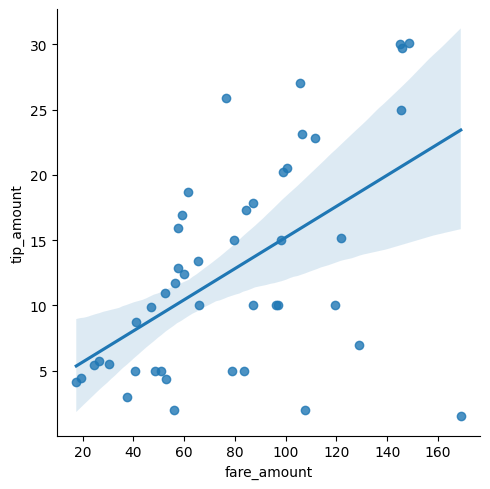

In [60]:
import seaborn as sns

sns.lmplot(x='fare_amount', y='tip_amount', data=taxi[['fare_amount', 'tip_amount']])
plt.show()

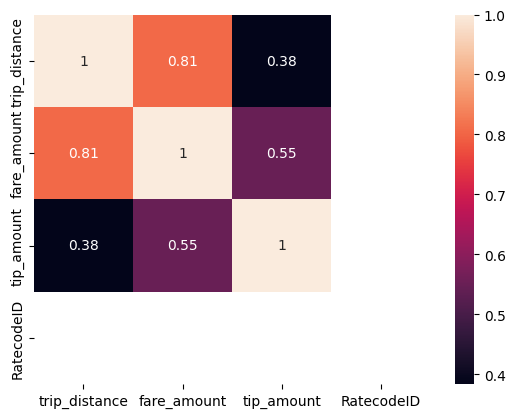

In [61]:
ax = sns.heatmap(taxi[['trip_distance', 'fare_amount', 'tip_amount', 'RatecodeID']].corr(), annot=True)
plt.show()

RANSAC for outliers

In [62]:
taxi = pd.read_parquet(path, engine='auto',
        columns=['trip_distance', 'tpep_pickup_datetime', "tip_amount", "fare_amount","RatecodeID"],
        storage_options=None, use_nullable_dtypes=False)

taxi.query("tpep_pickup_datetime>='2021-05-09' and tpep_pickup_datetime<'2021-05-10'",
    inplace=True)

taxi.query("tip_amount<=100 and fare_amount>0 and RatecodeID==4 and tip_amount>0", inplace=True)

In [63]:
from sklearn.linear_model import RANSACRegressor, LinearRegression

In [64]:
ransac = RANSACRegressor(estimator=LinearRegression(), max_trials=100, loss='squared_error', random_state=42, residual_threshold=10)

In [65]:
ransac.fit(taxi['fare_amount'].to_numpy().reshape(-1, 1), taxi['tip_amount'].to_numpy().reshape(-1, 1))

RANSACRegressor(estimator=LinearRegression(), loss='squared_error',
                random_state=42, residual_threshold=10)

In [66]:
inliers_mask = ransac.inlier_mask_  #true gdy inlier false gdy outlier
outlier_mask = np.logical_not(inliers_mask)

In [67]:
taxi = taxi[inliers_mask]

In [68]:
print(f"Covariance: {taxi['fare_amount'].cov(taxi['tip_amount'])}")
print(taxi[['trip_distance', 'fare_amount', 'tip_amount', 'RatecodeID']].cov())

Covariance: 891.4711956521743
               trip_distance  fare_amount  tip_amount  RatecodeID
trip_distance     188.259833   900.418113  181.434572         0.0
fare_amount       900.418113  4440.219368  891.471196         0.0
tip_amount        181.434572   891.471196  179.253726         0.0
RatecodeID          0.000000     0.000000    0.000000         0.0


In [69]:
print(f"Correlation: {taxi['fare_amount'].corr(taxi['tip_amount'])}")
print(taxi[['trip_distance', 'fare_amount', 'tip_amount', 'RatecodeID']].corr())

Correlation: 0.9992427509208578
               trip_distance  fare_amount  tip_amount  RatecodeID
trip_distance       1.000000     0.984834    0.987659         NaN
fare_amount         0.984834     1.000000    0.999243         NaN
tip_amount          0.987659     0.999243    1.000000         NaN
RatecodeID               NaN          NaN         NaN         NaN


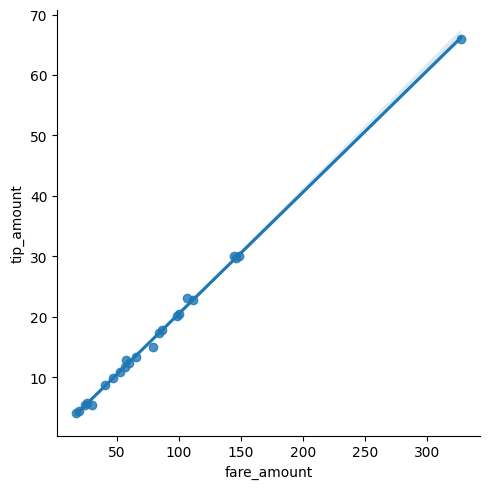

In [70]:
import seaborn as sns

sns.lmplot(x='fare_amount', y='tip_amount', data=taxi[['fare_amount', 'tip_amount']])
plt.show()

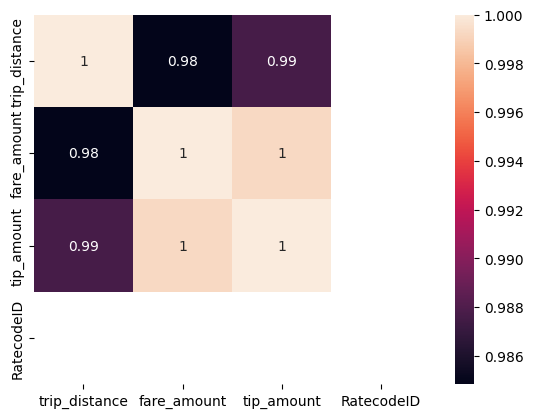

In [71]:
ax = sns.heatmap(taxi[['trip_distance', 'fare_amount', 'tip_amount', 'RatecodeID']].corr(), annot=True)
plt.show()